=== KMeans Clustering Results ===
Homogeneity score  = 0.698
Completeness score = 0.699
V-measure score    = 0.698
Silhouette score   = 0.473


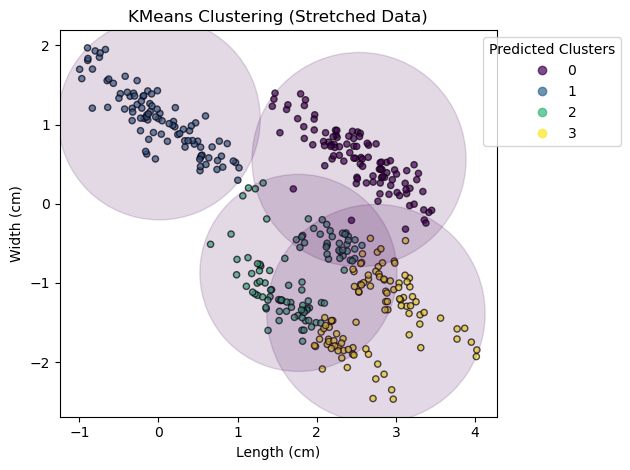

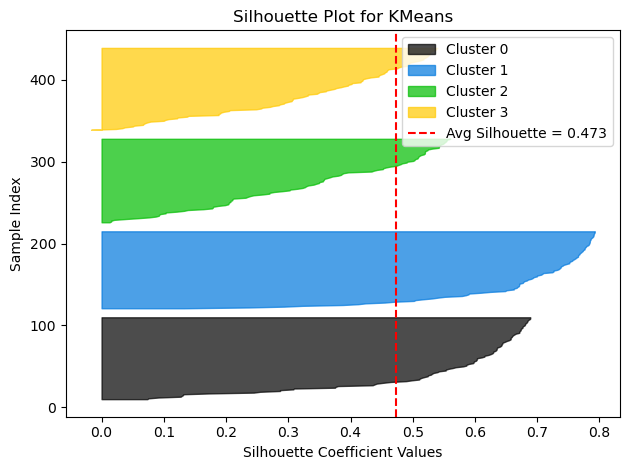


=== GMM Clustering Results ===
Homogeneity score  = 0.980
Completeness score = 0.980
V-measure score    = 0.980
Silhouette score   = 0.480


C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_22672\3959814509.py:82: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  add_ellipses(gmm, plt.gca(), plt.cm.get_cmap('viridis', gmm.n_components))


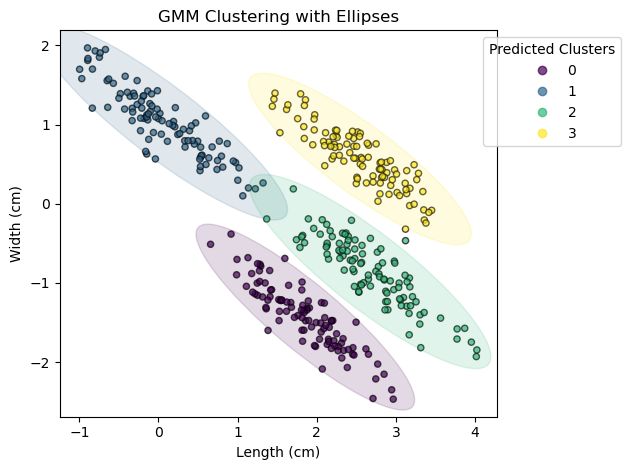

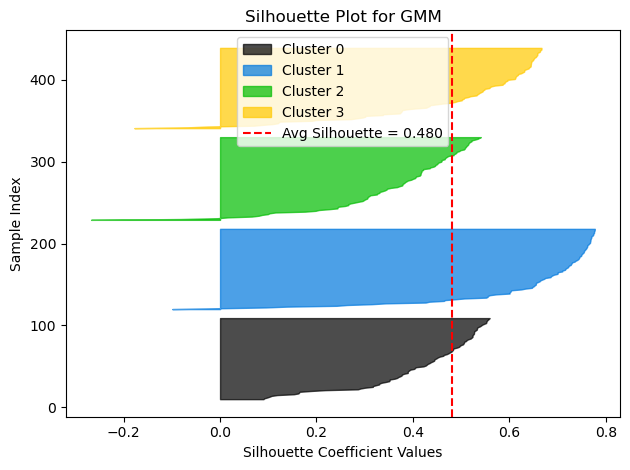

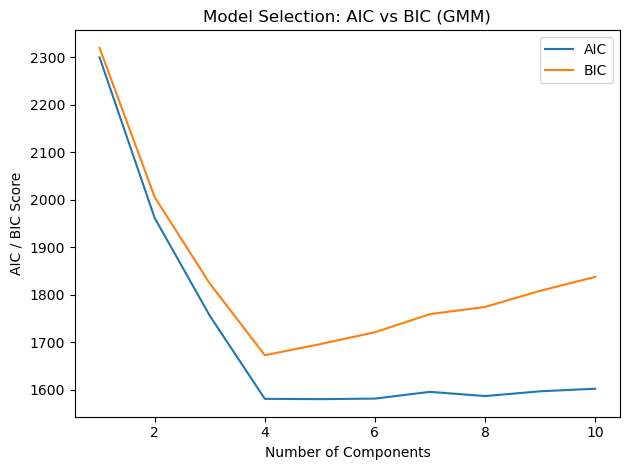

In [1]:
# ===============================================
# Main execution for Clustering Capstone
# ===============================================

"""
Main script for clustering comparison using:
- KMeans clustering with circular regions
- Gaussian Mixture Model (GMM) clustering with ellipses
- Quantitative evaluation: Homogeneity, Completeness, V-measure, Silhouette Score
- Visual evaluation: Cluster plots, Silhouette plots
- Model selection: AIC/BIC curves for GMM

This script uses helper functions from data_preprocessor.py.
"""

# === Import Libraries ===
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt

# === Import Preprocessing and Plotting Functions ===
from data_preprocessor import (
    generate_stretched_blob_data,
    evaluate_clustering,
    plot_clusters,
    plot_silhouette,
    add_ellipses
)

# === Feature Labels for Axis Naming ===
feature_names = ["Length (cm)", "Width (cm)"]

# === Step 1: Generate Synthetic Stretched Data ===
# -------------------------------------------------
# Generates isotropic blobs and stretches them to be elliptical using a random matrix
# This helps evaluate how GMM outperforms KMeans in non-spherical clusters

X_stretch, y_true = generate_stretched_blob_data()


# === Step 2: KMeans Clustering ===
# ----------------------------------
# Performs KMeans clustering with 4 clusters
# Plots clusters with transparent range circles
# Evaluates performance using standard metrics + silhouette score

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_stretch)
y_kmeans = kmeans.predict(X_stretch)

print("=== KMeans Clustering Results ===")
evaluate_clustering(y_true, y_kmeans, X=X_stretch)

plot_clusters(
    X_stretch, y_kmeans, centers=kmeans.cluster_centers_,
    method='kmeans',
    title='KMeans Clustering (Stretched Data)',
    feature_names=feature_names
)

plot_silhouette(
    X_stretch, y_kmeans, model_name="KMeans"
)


# === Step 3: Gaussian Mixture Model (GMM) Clustering ===
# --------------------------------------------------------
# Fits a GMM model to the same data
# Plots ellipses representing Gaussian components
# Evaluates performance using the same metrics

gmm = GMM(n_components=4, n_init=20).fit(X_stretch)
y_gmm = gmm.predict(X_stretch)

print("\n=== GMM Clustering Results ===")
evaluate_clustering(y_true, y_gmm, X=X_stretch)

# Plot GMM clusters and ellipses
plt.figure(dpi=100)
scat = plt.scatter(X_stretch[:, 1], X_stretch[:, 0], c=y_gmm, s=20,
                   alpha=0.7, edgecolors='k', cmap='viridis', label='Data Points')
add_ellipses(gmm, plt.gca(), plt.cm.get_cmap('viridis', gmm.n_components))

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.gca().legend(*scat.legend_elements(), title="Predicted Clusters", bbox_to_anchor=(1.3, 1))
plt.gca().set_aspect(1)
plt.title("GMM Clustering with Ellipses")
plt.tight_layout()
plt.show()

plot_silhouette(
    X_stretch, y_gmm, model_name="GMM"
)


# === Step 4: Model Selection (GMM) using AIC and BIC ===
# --------------------------------------------------------
# Fits GMM models with 1–10 components
# Compares AIC and BIC scores to determine optimal number of clusters

n_components = range(1, 11)
models = [GMM(n, n_init=20).fit(X_stretch) for n in n_components]
aics = [m.aic(X_stretch) for m in models]
bics = [m.bic(X_stretch) for m in models]

# Plot AIC and BIC scores
plt.figure(dpi=100)
plt.plot(n_components, aics, label='AIC')
plt.plot(n_components, bics, label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('AIC / BIC Score')
plt.title('Model Selection: AIC vs BIC (GMM)')
plt.legend()
plt.tight_layout()
plt.show()
